In [1]:
### setting for remote python debug, such as jupyter or pycharm, to avoid bedtools calling error
### run before "import scglue"
import os
from os import path
import sys
import shutil
import subprocess
bin_dir = path.dirname(sys.executable)
os.environ['PATH'] += os.pathsep + bin_dir #
## shutil.which('bedtools')
## subprocess.run(['bedtools', '--help'])

# import pybedtools
# pybedtools.set_bedtools_path('/mnt/disk1/xzhou/anaconda3/envs/PyG/bin/') ## 这里提前设置否则"sortBed"找不到
# # pybedtools.set_bedtools_path('/mnt/disk1/xzhou/code/')
# import importlib
# pybedtools = importlib.reload(pybedtools)
# print(pybedtools.settings.bedtools_version)
# print(pybedtools.helpers._version_2_15_plus_names("sortBed"))
# print(pybedtools.settings._bedtools_installed)

import anndata as ad
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
ad_sp = sc.read_h5ad("/mnt/disk1/xzhou/data/multi-omics/MERFISH/merfish-updated.h5ad")
# ad_sp.obs
#slice information
ad_sp1 = ad_sp[ad_sp.obs['slice_id']=='mouse1_slice180']
ad_sp1
#Add spatial information to rna data
ad_sp1.obsm['spatial'] = ad_sp1.obs[['center_x', 'center_y']].values
ad_sp1.X = ad_sp1.layers['X'].astype(int) ## MERFISH的counts不是整数，需要强制取整，否则后面报错
ad_sp1.obs[['x', 'y']] = ad_sp1.obs[['center_x', 'center_y']]
#cell_type information
ad_sp1.obs['cell_type'] = ad_sp1.obs['subclass']
rna = ad_sp1.copy()

rna

/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 6264 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y', 'cell_type'
    var: 'n_iso'
    obsm: 'spatial'
    layers: 'X', 'log1p', 'norm'

In [4]:
rna.obs["domain"] = "MERFISH"
rna.obs["protocol"] = "MERFISH"
rna.obs["dataset"] = "MERFISH"

scglue.data.get_gene_annotation(
    rna, gtf="/mnt/disk1/xzhou/code/pycharm_project/GLUE-master/data/download/gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz",
    gtf_by="gene_name"
)
rna.var["genome"] = "mm10"

rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
1700022I11Rik,chr4,42969603.0,42983640.0
1810046K07Rik,chr9,51289685.0,51328924.0
5031425F14Rik,chr2,166447450.0,166459232.0
5730522E02Rik,chr11,25602762.0,26210763.0
Acta2,chr19,34241089.0,34255590.0


In [5]:
rna.var

,n_iso,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,gene_id,gene_type,mgi_id,havana_gene,tag,genome
1700022I11Rik,5,chr4,42969603.0,42983640.0,1700022I11Rik,.,+,.,.,.,.,.,.,ENSMUSG00000028451.12,protein_coding,MGI:1914567,OTTMUSG00000006689.4,NaN,mm10
1810046K07Rik,2,chr9,51289685.0,51328924.0,1810046K07Rik,.,-,.,.,.,.,.,.,ENSMUSG00000036027.13,protein_coding,MGI:1917059,OTTMUSG00000042657.6,NaN,mm10
5031425F14Rik,1,chr2,166447450.0,166459232.0,5031425F14Rik,.,+,.,.,.,.,.,.,ENSMUSG00000085129.1,lincRNA,MGI:2442533,OTTMUSG00000016142.1,NaN,mm10
5730522E02Rik,8,chr11,25602762.0,26210763.0,5730522E02Rik,.,-,.,.,.,.,.,.,ENSMUSG00000032985.15,protein_coding,MGI:1917876,OTTMUSG00000005299.3,NaN,mm10
Acta2,1,chr19,34241089.0,34255590.0,Acta2,.,-,.,.,.,.,.,.,ENSMUSG00000035783.9,protein_coding,MGI:87909,OTTMUSG00000074035.1,NaN,mm10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sst,1,chr16,23889572.0,23890958.0,Sst,.,-,.,.,.,.,.,.,ENSMUSG00000004366.4,protein_coding,MGI:98326,OTTMUSG00000071306.1,NaN,mm10
Rab3b,4,chr4,108879062.0,108943324.0,Rab3b,.,+,.,.,.,.,.,.,ENSMUSG00000003411.10,protein_coding,MGI:1917158,OTTMUSG00000008236.1,NaN,mm10
Slc17a7,5,chr7,45163948.0,45176142.0,Slc17a7,.,+,.,.,.,.,.,.,ENSMUSG00000070570.5,protein_coding,MGI:1920211,OTTMUSG00000058649.1,ncRNA_host,mm10
Penk,2,chr4,4133530.0,4138819.0,Penk,.,-,.,.,.,.,.,.,ENSMUSG00000045573.9,protein_coding,MGI:104629,OTTMUSG00000004406.2,NaN,mm10


In [6]:
retained_genes = rna.var.dropna(subset=["chrom", "chromStart", "chromEnd"]).index
#sprase matrix
rna = rna[:, retained_genes]
rna.var = rna.var.astype({"chromStart": int, "chromEnd": int})
rna

AnnData object with n_obs × n_vars = 6264 × 251
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y', 'cell_type', 'domain', 'protocol', 'dataset'
    var: 'n_iso', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'mgi_id', 'havana_gene', 'tag', 'genome'
    obsm: 'spatial'
    layers: 'X', 'log1p', 'norm'

In [7]:
#filter low expression gene
sc.pp.filter_genes(rna, min_counts=1)
rna

AnnData object with n_obs × n_vars = 6264 × 251
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y', 'cell_type', 'domain', 'protocol', 'dataset'
    var: 'n_iso', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'mgi_id', 'havana_gene', 'tag', 'genome', 'n_counts'
    obsm: 'spatial'
    layers: 'X', 'log1p', 'norm'

In [8]:
atac = ad.read_h5ad("/mnt/disk1/xzhou/code/pycharm_project/GLUE-master/data/download/Chen-2019/Chen-2019-ATAC.h5ad")
atac

AnnData object with n_obs × n_vars = 9190 × 241757
    obs: 'domain', 'cell_type'

In [9]:
print(atac.obs)

                           domain  cell_type
cells                                       
09L_GTAAACCCGATA_ATAC  scATAC-seq  E2Rasgrf2
09D_GCCGGGCGGCCG_ATAC  scATAC-seq   E4Thsd7a
09J_TAGGCCTGAATT_ATAC  scATAC-seq  E2Rasgrf2
09C_TCCGGCATCTCA_ATAC  scATAC-seq     E6Tle4
09C_AGGCCACGTACA_ATAC  scATAC-seq  E2Rasgrf2
...                           ...        ...
09H_GTTTACCTAGTT_ATAC  scATAC-seq        InP
09F_TAGTTGGCAGAT_ATAC  scATAC-seq     E3Rorb
09L_CTTAGACGTCTA_ATAC  scATAC-seq     E6Tle4
09C_GATGTAATTTGA_ATAC  scATAC-seq        InV
09I_TAGGCTTATTGT_ATAC  scATAC-seq     E3Rorb

[9190 rows x 2 columns]


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-

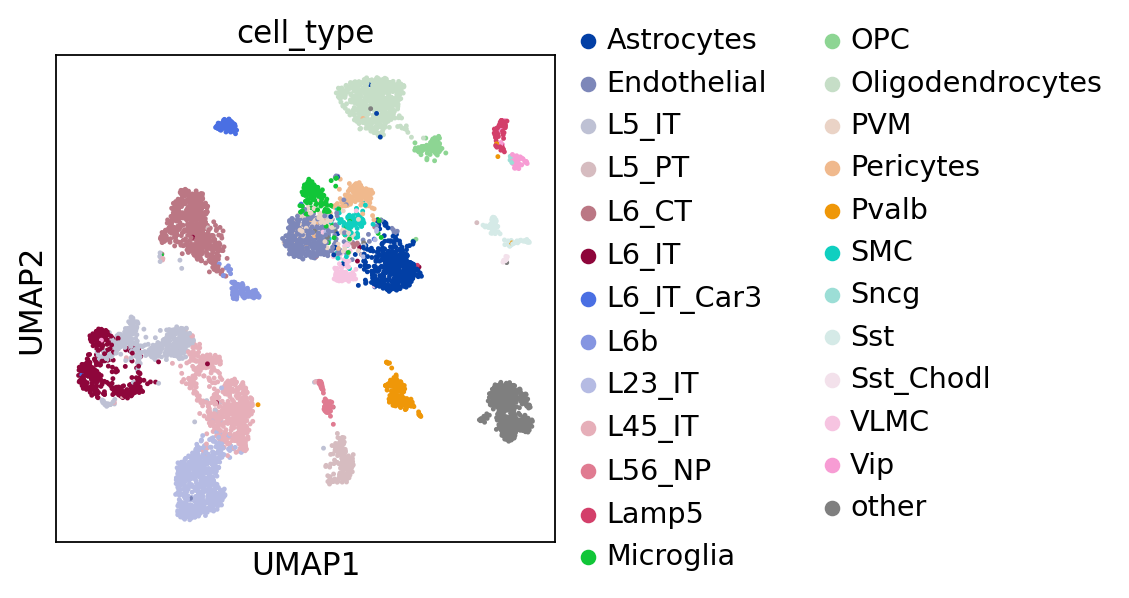

In [10]:
#X backup copy
rna.layers["counts"] = rna.X.copy()
#Label highly expressed genes
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")
#Make the counts of each cell equal
sc.pp.normalize_total(rna)
#将数据拉伸到更宽的范围，减小极端值的影响
sc.pp.log1p(rna)
#将数据转换为正态分布
sc.pp.scale(rna)
#数据降维
sc.tl.pca(rna, n_comps=100, svd_solver="auto")
#余弦相似度计算近邻关系
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)
sc.pl.umap(rna, color="cell_type")

In [11]:
atac.X, atac.X.data

(<9190x241757 sparse matrix of type '<class 'numpy.float32'>'
 	with 22575391 stored elements in Compressed Sparse Row format>,
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32))

NameError: name 'rna' is not defined

/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


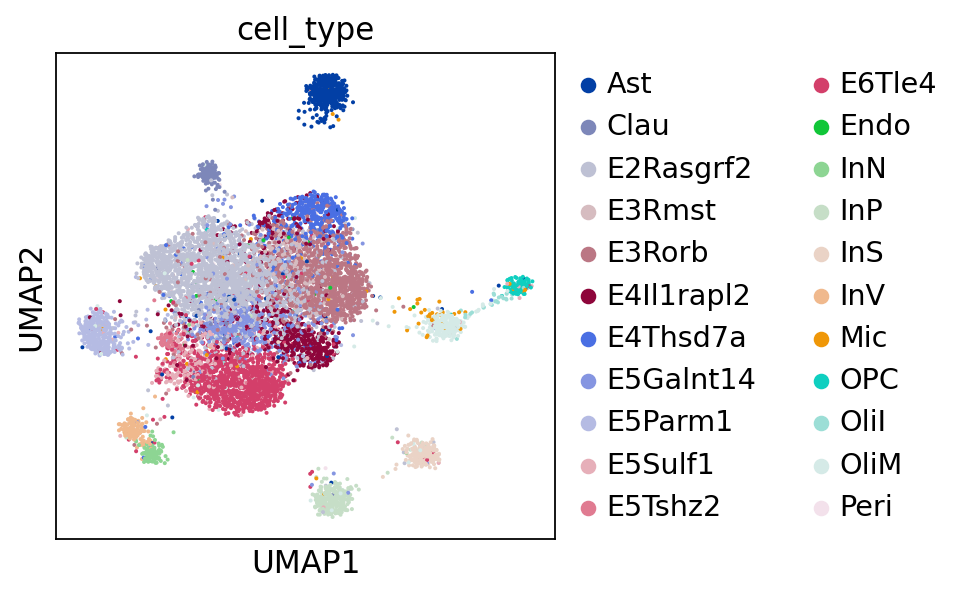

In [13]:
sc.pp.filter_genes(atac, min_cells=5)
scglue.data.lsi(atac, n_components=100, use_highly_variable=False, n_iter=15)
sc.pp.neighbors(atac, use_rep="X_lsi", metric="cosine")
sc.tl.umap(atac)
sc.pl.umap(atac, color="cell_type")

In [14]:
atac.var_names[:5]

Index(['chr1:3094772-3095489', 'chr1:3119556-3120739', 'chr1:3121334-3121696',
       'chr1:3134637-3135032', 'chr1:3164929-3165186'],
      dtype='object', name='peaks')

In [15]:
split = atac.var_names.str.split(r"[:-]")
atac.var["chrom"] = split.map(lambda x: x[0])
atac.var["chromStart"] = split.map(lambda x: x[1]).astype(int)
atac.var["chromEnd"] = split.map(lambda x: x[2]).astype(int)
atac.var.head()

,n_cells,chrom,chromStart,chromEnd
peaks,,,,
chr1:3094772-3095489,117,chr1,3094772,3095489
chr1:3119556-3120739,397,chr1,3119556,3120739
chr1:3121334-3121696,106,chr1,3121334,3121696
chr1:3134637-3135032,7,chr1,3134637,3135032
chr1:3164929-3165186,11,chr1,3164929,3165186


In [16]:
atac

AnnData object with n_obs × n_vars = 9190 × 223926
    obs: 'domain', 'cell_type'
    var: 'n_cells', 'chrom', 'chromStart', 'chromEnd'
    uns: 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_lsi', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
# ## 注意这里会把RNA的高可变基因传到ATAC中
guidance = scglue.genomics.rna_anchored_guidance_graph(rna, atac, propagate_highly_variable = True)
guidance

In [18]:
scglue.graph.check_graph(guidance, [rna, atac])

[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] check_graph: All checks passed!


In [19]:
atac.var.head()

,n_cells,chrom,chromStart,chromEnd,highly_variable
peaks,,,,,
chr1:3094772-3095489,117,chr1,3094772,3095489,False
chr1:3119556-3120739,397,chr1,3119556,3120739,False
chr1:3121334-3121696,106,chr1,3121334,3121696,False
chr1:3134637-3135032,7,chr1,3134637,3135032,False
chr1:3164929-3165186,11,chr1,3164929,3165186,False


In [20]:
atac

AnnData object with n_obs × n_vars = 9190 × 223926
    obs: 'domain', 'cell_type'
    var: 'n_cells', 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_lsi', 'X_umap'
    obsp: 'distances', 'connectivities'

In [21]:
rna.write("rna-pp.h5ad", compression="gzip")
atac.write("atac-pp.h5ad", compression="gzip")
nx.write_graphml(guidance, "MERFISH_ATAC_guidance.graphml.gz")

In [22]:
from itertools import chain

import anndata as ad
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

In [23]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [24]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [25]:
scglue.models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)

In [26]:
guidance_hvf = guidance.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac.var.index
)).copy()
# atac.var.query("highly_variable").index

In [27]:
assert scglue.num.all_counts(rna.layers["counts"])
# assert scglue.num.all_counts(atac.layers["counts"])

In [28]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, guidance_hvf,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 3 as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] check_graph: All checks passed!
[INFO] SCGLUEModel: Setting `graph_batch_size` = 80189
[INFO] SCGLUEModel: Setting `max_epochs` = 221
[INFO] SCGLUEModel: Setting `patience` = 19
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 10
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.091, 'g_kl': 0.0, 'g_elbo': 0.091, 'x_rna_nll': 0.651, 'x_rna_kl': 0.053, 'x_rna_elbo': 0.704, 'x_atac_nll': 0.038, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.039, 'dsc_loss': 0.689, 'vae_loss': 0.746, 'gen_loss': 0.712}, val={'g_nll': 0.089, 'g_kl': 0.0, 'g_elbo': 0.089, 'x_rna_nll': 0.632, 'x_rna_kl': 0.052, 'x_rna_elbo': 0.684, 'x_atac_nll': 0.039, 'x_atac_k

2023-08-16 00:29:31,973 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "81"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (23, 19)...
[INFO] estimate_balancing_weight: Estimating balancing weight...


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] check_graph: All checks passed!
[INFO] SCGLUEModel: Setting `graph_batch_size` = 80189
[INFO] SCGLUEModel: Setting `align_burnin` = 37
[INFO] SCGLUEModel: Setting `max_epochs` = 221
[INFO] SCGLUEModel: Setting `patience` = 19
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 10
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.047, 'g_kl': 0.0, 'g_elbo': 0.048, 'x_rna_nll': 0.627, 'x_rna_kl': 0.053, 'x_rna_elbo': 0.68, 'x_atac_nll': 0.037, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.038, 'dsc_loss': 0.686, 'vae_loss': 0.72, 'gen_loss': 0.686}, val={'g_nll': 0.048, 'g_kl': 0.0, 'g_elbo': 0.048, 'x_rna_nll': 0.62, 'x_rna_kl': 0.05, 'x_rna_elbo': 0.67, 'x_atac_nll': 0.037, 'x_atac_kl': 0.001,

2023-08-16 00:40:47,094 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "77"...


In [29]:
# %tensorboard --logdir=glue
# glue.save("MERFISH_ATAC_glue.dill")
# glue = scglue.models.load_model("glue.dill")

In [30]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "atac": atac}, guidance_hvf
)
dx

[INFO] integration_consistency: Using layer "counts" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "atac"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "rna"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "atac"
[INFO] get_metacells: Clustering metacells...


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 10 common metacells...
[INFO] get_metacells: Clustering metacells...


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 20 common metacells...
[INFO] get_metacells: Clustering metacells...


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 50 common metacells...
[INFO] get_metacells: Clustering metacells...


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 100 common metacells...
[INFO] get_metacells: Clustering metacells...


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 198 common metacells...


,n_meta,consistency
0,10,0.120390
1,20,0.091012
2,50,0.066132
3,100,0.051764
4,200,0.039110


In [31]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [32]:
rna

AnnData object with n_obs × n_vars = 6264 × 251
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y', 'cell_type', 'domain', 'protocol', 'dataset', 'balancing_weight'
    var: 'n_iso', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'mgi_id', 'havana_gene', 'tag', 'genome', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors', '__scglue__'
    obsm: 'spatial', 'X_pca', 'X_umap', 'X_glue'
    varm: 'PCs'
    layers: 'X', 'log1p', 'norm', 'counts'
    obsp: 'distances', 'connectivities'

In [33]:
atac

AnnData object with n_obs × n_vars = 9190 × 223926
    obs: 'domain', 'cell_type', 'balancing_weight'
    var: 'n_cells', 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: 'neighbors', 'umap', 'cell_type_colors', '__scglue__'
    obsm: 'X_lsi', 'X_umap', 'X_glue'
    obsp: 'distances', 'connectivities'

In [34]:
combined = ad.concat([rna, atac])

/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [35]:
combined

AnnData object with n_obs × n_vars = 15454 × 0
    obs: 'cell_type', 'domain', 'balancing_weight'
    obsm: 'X_umap', 'X_glue'

/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


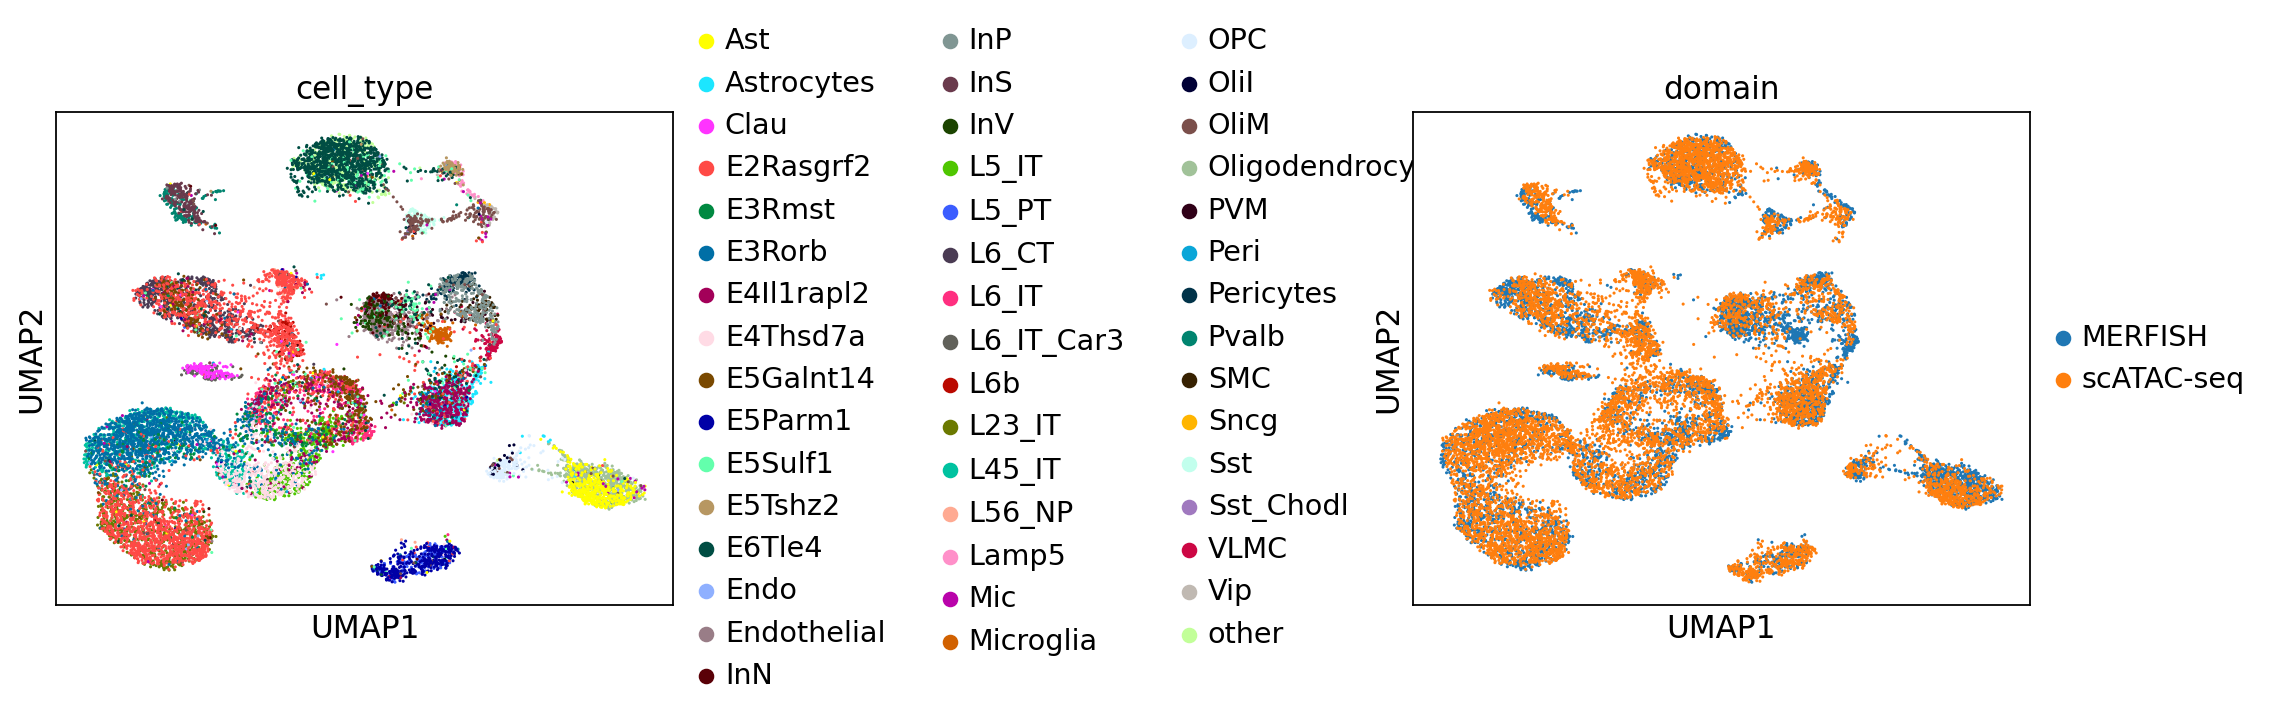

In [36]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=1)

In [37]:
combined

AnnData object with n_obs × n_vars = 15454 × 0
    obs: 'cell_type', 'domain', 'balancing_weight'
    uns: 'neighbors', 'umap', 'cell_type_colors', 'domain_colors'
    obsm: 'X_umap', 'X_glue'
    obsp: 'distances', 'connectivities'

/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


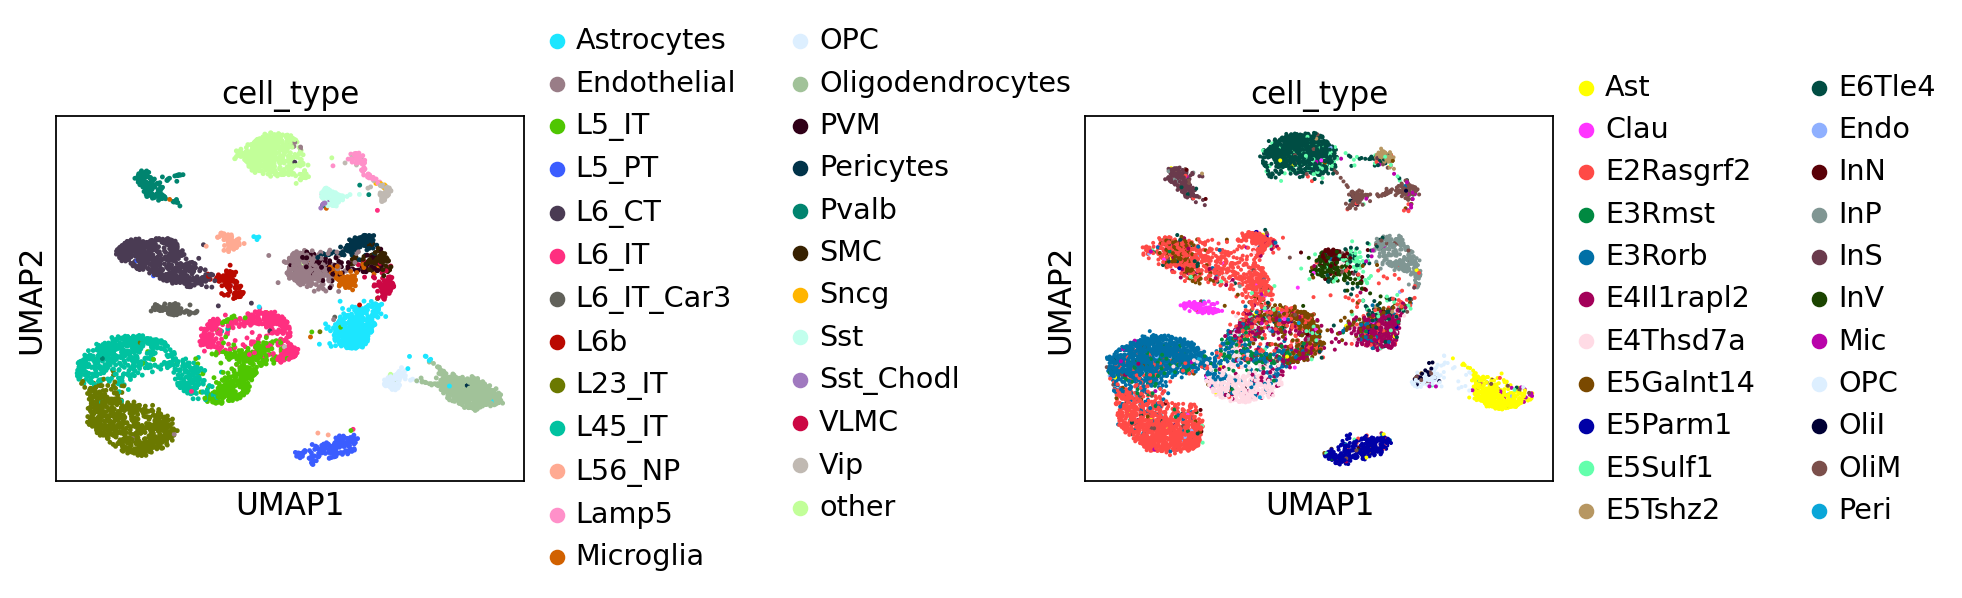

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'wspace': 1.2, 'hspace': 0.2})

sc.pl.umap(combined[combined.obs['domain']=="MERFISH"], color=["cell_type"], wspace=1, ax=ax[0], show=False)
sc.pl.umap(combined[combined.obs['domain']=="scATAC-seq"], color=["cell_type"], wspace=1, ax=ax[1], show=False)
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(atac.obsm["X_glue"], atac.obs["cell_type"])
print(neigh.predict(rna.obsm["X_glue"]))
print(neigh.predict_proba(rna.obsm["X_glue"]))

['E2Rasgrf2' 'Ast' 'E3Rorb' ... 'E2Rasgrf2' 'E2Rasgrf2' 'E3Rorb']
[[0.         0.         1.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [40]:
import numpy as np
rna.obsm["tangram_ct_pred"] = pd.DataFrame(neigh.predict_proba(rna.obsm["X_glue"]),
                                           index=rna.obs_names, columns=np.sort(list(atac.obs["cell_type"].unique())))

In [41]:
def construct_obs_plot(df_plot, adata, perc=0, suffix=None):
    # clip
    df_plot = df_plot.clip(df_plot.quantile(perc), df_plot.quantile(1 - perc), axis=1)

    # normalize
    df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

    if suffix:
        df_plot = df_plot.add_suffix(" ({})".format(suffix))
    adata.obs = pd.concat([adata.obs, df_plot], axis=1)
    
    
def plot_cell_annotation_sc(
    adata_sp, 
    annotation_list, 
    x="x", 
    y="y", 
    spot_size=None, 
    scale_factor=None, 
    perc=0,
    alpha_img=1.0,
    bw=False,
    ax=None
):
        
    # remove previous df_plot in obs
    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

    # construct df_plot
    df = adata_sp.obsm["tangram_ct_pred"][annotation_list]
    construct_obs_plot(df, adata_sp, perc=perc)
    
    #non visium data 
    if 'spatial' not in adata_sp.obsm.keys():
        #add spatial coordinates to obsm of spatial data 
        coords = [[x,y] for x,y in zip(adata_sp.obs[x].values,adata_sp.obs[y].values)]
        adata_sp.obsm['spatial'] = np.array(coords)
    
    if 'spatial' not in adata_sp.uns.keys() and spot_size == None and scale_factor == None:
        raise ValueError("Spot Size and Scale Factor cannot be None when ad_sp.uns['spatial'] does not exist")
    
    #REVIEW
    if 'spatial' in adata_sp.uns.keys() and spot_size != None and scale_factor != None:
        raise ValueError("Spot Size and Scale Factor should be None when ad_sp.uns['spatial'] exists")
    
    sc.pl.spatial(
        adata_sp, color=annotation_list, cmap="viridis", show=False, frameon=False, spot_size=spot_size,
        scale_factor=scale_factor, alpha_img=alpha_img, bw=bw, ax=ax, colorbar_loc=None,ncols=5,wspace=0
    )

    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

In [42]:
list(atac.obs["cell_type"].unique())

['E2Rasgrf2',
 'E4Thsd7a',
 'E6Tle4',
 'InS',
 'E5Galnt14',
 'OPC',
 'E3Rmst',
 'Clau',
 'E5Parm1',
 'E3Rorb',
 'OliM',
 'Ast',
 'E5Sulf1',
 'InP',
 'InN',
 'Endo',
 'E4Il1rapl2',
 'Mic',
 'InV',
 'E5Tshz2',
 'OliI',
 'Peri']

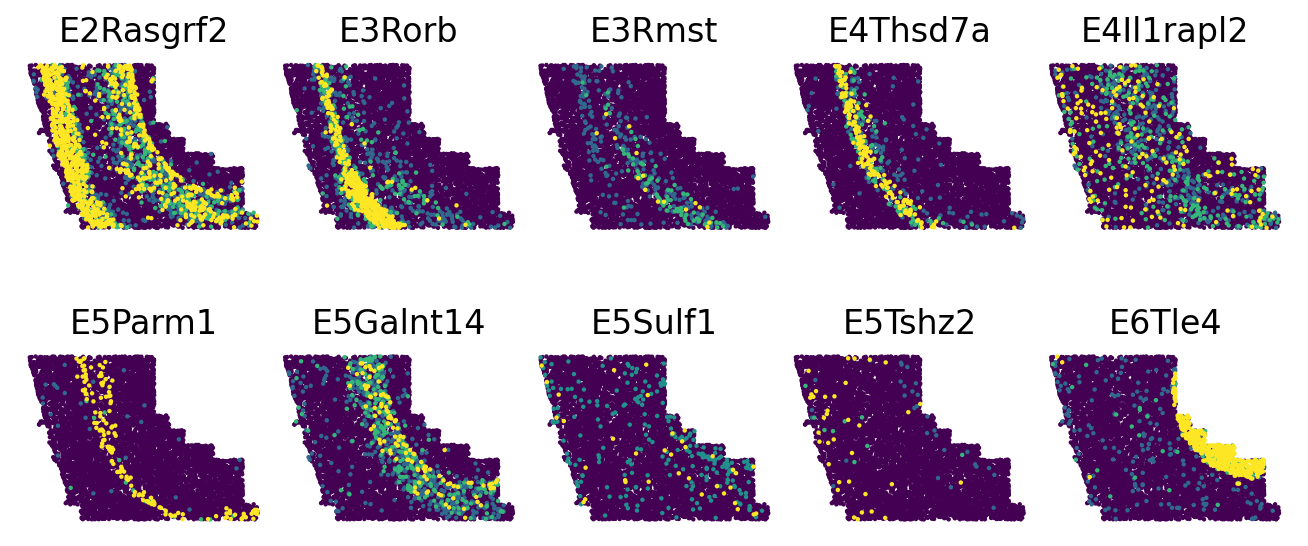

In [43]:
# tg.project_cell_annotations(ad_map, ad_sp1, annotation='subclass_label') 
##这里由于是FISH数据，每个spot都会对应一个细胞，如果是Visium，则需要对应多个细胞
# annotation_list = list(pd.unique(ad_sc.obs['subclass_label']))
annotation_list = ['E2Rasgrf2', 'E3Rorb','E3Rmst','E4Thsd7a','E4Il1rapl2','E5Parm1', 'E5Galnt14','E5Sulf1','E5Tshz2','E6Tle4']
sc.settings.set_figure_params(frameon=True, fontsize=15, facecolor='white',figsize=(2, 2)) #dpi=300, 
# import tangram as tg
plot_cell_annotation_sc(rna, annotation_list, x='x', y='y', spot_size= 60, scale_factor=0.1, perc=0.001)

In [44]:
feature_embeddings = glue.encode_graph(guidance_hvf)
feature_embeddings = pd.DataFrame(feature_embeddings, index=glue.vertices)
feature_embeddings.iloc[:5, :5]

,0,1,2,3,4
1700022I11Rik,0.007753,-0.018619,0.007550,-0.553095,-0.015020
1810046K07Rik,0.013406,-0.010565,0.003900,-0.017044,-0.010139
5031425F14Rik,0.022708,-0.025738,0.004791,0.259612,-0.016054
5730522E02Rik,0.008197,-0.008015,0.018551,-0.452300,0.002855
Acta2,0.015718,-0.012007,-0.003513,0.671391,-0.024906


In [45]:
feature_embeddings

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1700022I11Rik,0.007753,-0.018619,0.007550,-0.553095,-0.015020,-0.055538,0.012495,0.015903,-0.009750,0.002190,...,-0.009241,0.005228,-0.015932,0.005265,-0.371562,0.008393,-0.239095,-0.009935,-0.006760,0.104070
1810046K07Rik,0.013406,-0.010565,0.003900,-0.017044,-0.010139,0.031528,0.014345,0.014786,0.004441,0.003536,...,-0.014043,-0.004949,-0.019089,0.007831,0.011857,0.003241,0.048420,-0.013781,0.016005,-0.248201
5031425F14Rik,0.022708,-0.025738,0.004791,0.259612,-0.016054,-0.055126,0.009779,0.014474,0.001996,-0.010074,...,-0.011328,0.000909,-0.025738,0.005029,-0.013738,0.013142,0.283554,-0.013360,0.005329,0.074013
5730522E02Rik,0.008197,-0.008015,0.018551,-0.452300,0.002855,-0.128605,0.000137,0.009933,0.006067,-0.002285,...,-0.010355,0.013589,-0.017981,0.009235,0.497899,-0.011280,0.060929,-0.010948,0.006819,-0.715142
Acta2,0.015718,-0.012007,-0.003513,0.671391,-0.024906,0.011229,0.000996,0.006148,0.007533,0.006826,...,-0.003941,-0.001462,-0.006635,0.014643,0.014912,0.013821,-0.023374,-0.017978,0.030062,-0.251793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:1090474-1090713,-0.095687,0.097032,-0.032704,-4.404428,0.125692,-0.269933,-0.025197,-0.077850,-0.055934,-0.047657,...,0.105023,0.044574,0.113364,-0.003041,-0.086509,-0.070607,-2.422956,0.079606,-0.158219,1.776537
chrY:1232696-1232955,-0.098951,0.096246,-0.032398,-4.482335,0.128113,-0.307664,-0.024204,-0.080774,-0.058003,-0.050601,...,0.109124,0.043714,0.116777,-0.006774,-0.042207,-0.074087,-2.443090,0.082215,-0.161580,1.815518
chrY:1245435-1245988,-0.095927,0.096925,-0.032626,-4.489445,0.127902,-0.232521,-0.023038,-0.080281,-0.058390,-0.048550,...,0.107072,0.043513,0.115636,-0.006602,-0.038983,-0.073011,-2.421754,0.082720,-0.161593,1.827621
chrY:1246136-1246326,-0.095791,0.096248,-0.032210,-4.416142,0.126562,-0.278681,-0.023891,-0.079101,-0.057290,-0.048247,...,0.107530,0.043298,0.114058,-0.004828,-0.058010,-0.071504,-2.398512,0.081531,-0.158700,1.762330


In [46]:
rna.varm["X_glue"] = feature_embeddings.reindex(rna.var_names).to_numpy()
atac.varm["X_glue"] = feature_embeddings.reindex(atac.var_names).to_numpy()

In [47]:
rna.write("rna-emb.h5ad", compression="gzip")
atac.write("atac-emb.h5ad", compression="gzip")
nx.write_graphml(guidance_hvf, "guidance-hvf.graphml.gz")

In [48]:
import anndata as ad
import networkx as nx
import numpy as np
import pandas as pd
import scglue
import seaborn as sns
from IPython import display
from matplotlib import rcParams
from networkx.algorithms.bipartite import biadjacency_matrix
from networkx.drawing.nx_agraph import graphviz_layout

In [49]:
scglue.plot.set_publication_params()
rcParams['figure.figsize'] = (4, 4)

In [50]:
rna = ad.read_h5ad("rna-emb.h5ad")
atac = ad.read_h5ad("atac-emb.h5ad")
guidance_hvf = nx.read_graphml("guidance-hvf.graphml.gz")

In [51]:
rna.var["name"] = rna.var_names
atac.var["name"] = atac.var_names

In [52]:
genes = rna.var.query("highly_variable").index
peaks = atac.var.query("highly_variable").index

In [53]:
features = pd.Index(np.concatenate([rna.var_names, atac.var_names]))
feature_embeddings = np.concatenate([rna.varm["X_glue"], atac.varm["X_glue"]])

In [54]:
skeleton = guidance_hvf.edge_subgraph(
    e for e, attr in dict(guidance_hvf.edges).items()
    if attr["type"] == "fwd"
).copy()

In [55]:
reginf = scglue.genomics.regulatory_inference(
    features, feature_embeddings,
    skeleton=skeleton, random_state=0
)

regulatory_inference: 100%|██████████| 4549/4549 [00:00<00:00, 80310.67it/s]


In [56]:
gene2peak = reginf.edge_subgraph(
    e for e, attr in dict(reginf.edges).items()
    if attr["qval"] < 0.05
)

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /mnt/disk1/xiaojk/anaconda/envs/scGLUE1

  added / updated specs:
    - pygenometracks


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argh-0.27.2                |     pyhd8ed1ab_0          42 KB  conda-forge
    asciitree-0.3.3            |             py_2           6 KB  conda-forge
    aws-c-auth-0.7.0           |       hbbaa140_3         100 KB  conda-forge
    aws-c-cal-0.6.0            |       h93469e0_0          49 KB  conda-forge
    aws-c-common-0.8.23        |       hd590300_0         192 KB  conda-forge
    aws-c-compression-0.2.17   |       h862ab75_1          19 KB  conda-forge
    aws-c-event-stream-0.3.1   |       h95997

In [58]:
scglue.genomics.Bed(atac.var).write_bed("peaks.bed", ncols=3)
scglue.genomics.write_links(
    gene2peak,
    scglue.genomics.Bed(rna.var).strand_specific_start_site(),
    scglue.genomics.Bed(atac.var),
    "gene2peak.links", keep_attrs=["score"]
)

In [59]:
%%writefile tracks.ini

[Score]
file = gene2peak.links
title = Score
height = 2
color = YlGnBu
compact_arcs_level = 2
use_middle = True
file_type = links

[ATAC]
file = peaks.bed
title = ATAC
display = collapsed
border_color = none
labels = False
file_type = bed

[Genes]
file = gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz
title = Genes
prefered_name = gene_name
height = 4
merge_transcripts = True
labels = True
max_labels = 100
all_labels_inside = True
style = UCSC
file_type = gtf

[x-axis]
fontsize = 12

Overwriting tracks.ini


In [60]:
from IPython.display import Image, display
# 获取Gad2基因的位置信息
loc = rna.var.loc["Gad2"]
chrom = loc["chrom"]
chromLen = loc["chromEnd"] - loc["chromStart"]
chromStart = loc["chromStart"] - chromLen
chromEnd = loc["chromEnd"] + chromLen
out_folder = "/mnt/disk1/jkxiao/code/Anaconda/envs/scGLUE/lib/python3.10/site-packages/scglue"
# 创建轨迹图配置文件 tracks.ini
# ...

# 生成轨迹图
!pyGenomeTracks --tracks tracks.ini \
    --region {chrom}:{chromStart}-{chromEnd} \
    --outFileName {out_folder}/tracks.png 2> /dev/null

# 在JupyterLab中显示图像
display(Image(filename=f"{out_folder}/tracks.png"))

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/disk1/jkxiao/code/Anaconda/envs/scGLUE/lib/python3.10/site-packages/scglue/tracks.png'

In [ ]:
motif_bed = scglue.genomics.read_bed(wget.download("http://download.gao-lab.org/GLUE/cisreg/JASPAR2022-mm10.bed.gz"))
motif_bed.head()

In [ ]:
tfs = pd.Index(motif_bed["name"]).intersection(rna.var_names)
tfs.size

In [ ]:
rna[:, np.union1d(genes, tfs)].write_loom("rna.loom")
np.savetxt("tfs.txt", tfs, fmt="%s")

In [ ]:
import pyscenic
!pyscenic grn rna.loom tfs.txt \
    -o draft_grn.csv --seed 0 --num_workers 20 \
    --cell_id_attribute cells --gene_attribute genes

In [ ]:
peak_bed = scglue.genomics.Bed(atac.var.loc[peaks])
peak2tf = scglue.genomics.window_graph(peak_bed, motif_bed, 0, right_sorted=True)
peak2tf = peak2tf.edge_subgraph(e for e in peak2tf.edges if e[1] in tfs)

In [ ]:
gene2tf_rank_glue = scglue.genomics.cis_regulatory_ranking(
    gene2peak, peak2tf, genes, peaks, tfs,
    region_lens=atac.var.loc[peaks, "chromEnd"] - atac.var.loc[peaks, "chromStart"],
    random_state=0
)
gene2tf_rank_glue.iloc[:5, :5]

In [ ]:
gene2tf_rank_glue = scglue.genomics.cis_regulatory_ranking(
    gene2peak, peak2tf, genes, peaks, tfs,
    region_lens=atac.var.loc[peaks, "chromEnd"] - atac.var.loc[peaks, "chromStart"],
    random_state=0
)
gene2tf_rank_glue.iloc[:5, :5]

In [ ]:
flank_bed = scglue.genomics.Bed(rna.var.loc[genes]).strand_specific_start_site().expand(500, 500)
flank2tf = scglue.genomics.window_graph(flank_bed, motif_bed, 0, right_sorted=True)

In [ ]:
gene2flank = nx.Graph([(g, g) for g in genes])
gene2tf_rank_supp = scglue.genomics.cis_regulatory_ranking(
    gene2flank, flank2tf, genes, genes, tfs,
    n_samples=0
)
gene2tf_rank_supp.iloc[:5, :5]

In [ ]:
gene2tf_rank_glue.columns = gene2tf_rank_glue.columns + "_glue"
gene2tf_rank_supp.columns = gene2tf_rank_supp.columns + "_supp"

In [ ]:
scglue.genomics.write_scenic_feather(gene2tf_rank_glue, "glue.genes_vs_tracks.rankings.feather")
scglue.genomics.write_scenic_feather(gene2tf_rank_supp, "supp.genes_vs_tracks.rankings.feather")

In [ ]:
pd.concat([
    pd.DataFrame({
        "#motif_id": tfs + "_glue",
        "gene_name": tfs
    }),
    pd.DataFrame({
        "#motif_id": tfs + "_supp",
        "gene_name": tfs
    })
]).assign(
    motif_similarity_qvalue=0.0,
    orthologous_identity=1.0,
    description="placeholder"
).to_csv("ctx_annotation.tsv", sep="\t", index=False)

In [ ]:
!pyscenic ctx draft_grn.csv \
    glue.genes_vs_tracks.rankings.feather \
    supp.genes_vs_tracks.rankings.feather \
    --annotations_fname ctx_annotation.tsv \
    --expression_mtx_fname rna.loom \
    --output pruned_grn.csv \
    --rank_threshold 500 --min_genes 1 \
    --num_workers 20 \
    --cell_id_attribute cells --gene_attribute genes 2> /dev/null

In [ ]:
grn = scglue.genomics.read_ctx_grn("pruned_grn.csv")

In [ ]:
rcParams['figure.figsize'] = (10, 10)
nx.draw(grn, graphviz_layout(grn), with_labels=True)

In [ ]:
nx.write_graphml(grn, "pruned_grn.graphml.gz")